### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
%matplotlib inline

C:\Users\Abby\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### The Data

In [2]:
df = pd.read_csv('ERS.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [4]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


### Missing Data

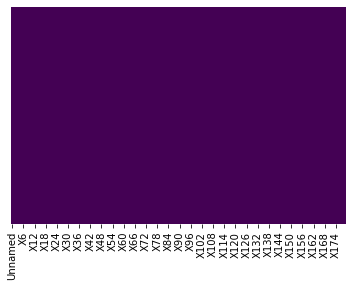

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### No missing data

### Transposing the Data

In [7]:
df_transpose = pd.read_csv('ERS.csv', index_col='Unnamed')
df_transpose = df.transpose()
df_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,11490,11491,11492,11493,11494,11495,11496,11497,11498,11499
Unnamed,X21.V1.791,X15.V1.924,X8.V1.1,X16.V1.60,X20.V1.54,X14.V1.56,X3.V1.191,X11.V1.273,X19.V1.874,X3.V1.491,...,X14.V1.404,X20.V1.883,X13.V1.624,X23.V1.714,X21.V1.762,X22.V1.114,X19.V1.354,X8.V1.28,X10.V1.932,X16.V1.210
X1,135,386,-32,-105,-9,55,-55,1,-278,8,...,-22,102,-27,-136,-39,-22,-47,14,-40,29
X2,190,382,-39,-101,-65,28,-9,-2,-246,15,...,-64,137,-53,-137,-16,-22,-11,6,-25,41
X3,229,356,-47,-96,-98,18,52,-8,-215,13,...,-121,158,-84,-138,-13,-23,28,-13,-9,57
X4,223,331,-37,-92,-102,16,111,-11,-191,3,...,-201,158,-104,-135,-14,-26,77,-16,-12,72


### Exploratory Analaysis

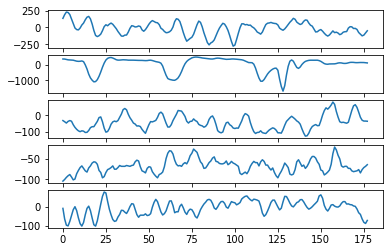

In [8]:
#Kaggle Originator's example just used the first 5 of the dataset instead 
X = df.iloc[:,1:179].values



plt.subplot(511)
plt.plot(X[0,:])

plt.subplot(512)
plt.plot(X[1,:])

plt.subplot(513)
plt.plot(X[2,:])

plt.subplot(514)
plt.plot(X[3,:])

plt.subplot(515)
plt.plot(X[4,:])


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


C:\Users\Abby\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


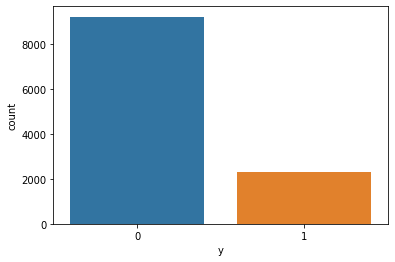

In [9]:
#Kaggle setup

cols = df.columns
tgt = df.y
tgt[tgt>1]=0
ax = sns.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns = ['y', 'Unnamed'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [12]:
df[df.y == 1] # all the rows where y = 1
df[df.y != 1] # all the rows where y does not equal 1

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,X21.V1.762,-39,-16,-13,-14,-68,-84,-92,-61,-89,...,-102,-75,-63,-44,-66,-49,-34,-31,-52,0
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import time 

In [14]:
start_time = time.time()
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(str(time.time() - start_time))

C:\Users\Abby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15.005805969238281


C:\Users\Abby\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
# intercept
print(logmodel.intercept_)

[-1.1096039]


In [16]:
predictions = logmodel.predict(X_test)

#check
#for i in predictions:
#    print(i)

print(predictions)

[0 0 0 ... 0 0 0]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2781
           1       0.89      0.14      0.24       669

    accuracy                           0.83      3450
   macro avg       0.86      0.57      0.57      3450
weighted avg       0.84      0.83      0.78      3450



In [20]:
print(confusion_matrix(y_test,predictions))

[[2769   12]
 [ 575   94]]


### Support Vector Machine

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [22]:
svm = SVC()

In [23]:
start_time = time.time()
svm.fit(X_train,y_train)
print(str(time.time() - start_time))

C:\Users\Abby\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


31.042408227920532


In [24]:
svm_predict = svm.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,svm_predict))

[[2781    0]
 [ 669    0]]


In [27]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2781
           1       0.00      0.00      0.00       669

    accuracy                           0.81      3450
   macro avg       0.40      0.50      0.45      3450
weighted avg       0.65      0.81      0.72      3450



C:\Users\Abby\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Gridsearch

In [ ]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'linear']} 

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,cv = 3, verbose=3)  

In [ ]:
start_time = time.time()
grid.fit(X_train,y_train)
print(str(time.time() - start_time))

In [ ]:
grid.best_params_

grid.cv_results_

In [ ]:
grid.best_estimator_

### Linear SVM

In [ ]:
svm_lin = SVC(kernel = 'linear', C=100)
start_time = time.time()
svm_lin.fit(X_train,y_train)
print(str(time.time() - start_time))

In [ ]:
print(classification_report(y_test,predictions))

### K-Nearest Neighbors 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [29]:
knn = KNeighborsClassifier(n_neighbors=2)

In [30]:
start_time = time.time()
knn.fit(X_train,y_train)
print(str(time.time() - start_time))

0.08180618286132812


In [31]:
pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,pred))

[[2779    2]
 [ 271  398]]


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2781
           1       0.99      0.59      0.74       669

    accuracy                           0.92      3450
   macro avg       0.95      0.80      0.85      3450
weighted avg       0.93      0.92      0.91      3450



In [ ]:
accuracy = []

for k in range(1,11):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
print('Accuracy:',accuracy, 'K:', k)
 

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### K-Folds Cross Validation 

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=2)
kf.get_n_splits(X)

### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb = GaussianNB()

In [43]:
start_time = time.time()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(str(time.time() - start_time))

0.07891416549682617


In [44]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3450 points : 141


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2781
           1       0.90      0.89      0.89       669

    accuracy                           0.96      3450
   macro avg       0.94      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



In [46]:
print(confusion_matrix(y_test, y_pred))

[[2714   67]
 [  74  595]]
